In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import tree
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data1 = pd.read_csv('data/raw/20220210T003523_300-500-true-300-5000-iperf.csv')
data2 = pd.read_csv('data/raw/20220210T003523_300-5000-true-300-500-iperf.csv')
data3 = pd.read_csv('data/raw/20220210T010808_400-2000-true-400-2000-iperf.csv')
data4 = pd.read_csv('data/raw/20220210T011704_500-3000-true-500-3000-iperf.csv')
data5 = pd.read_csv('data/raw/20220210T015628_600-4000-true-600-4000-iperf.csv')
data6 = pd.read_csv('data/raw/20220210T031531_700-4000-true-700-4000-iperf.csv')
data7 = pd.read_csv('data/raw/20220210T032446_900-6000-true-900-6000-iperf.csv')
data8 = pd.read_csv('data/raw/20220210T033058_1000-7000-true-1000-7000-iperf.csv')
data9 = pd.read_csv('data/raw/20220210T063725_1100-2500-true-1100-2500-iperf.csv')

In [3]:
#optional - take out first 25 seconds of data
data1 = data1[25:]
data2 = data2[25:]
data3 = data3[25:]
data4 = data4[25:]
data5 = data5[25:]
data6 = data6[25:]
data7 = data7[25:]
data8 = data8[25:]
data9 = data9[25:]

In [4]:
#reset "Time" to arbitrary values
data1['time'] = np.arange(len(data1))
data2['time'] = np.arange(len(data2))
data3['time'] = np.arange(len(data3))
data4['time'] = np.arange(len(data4))
data5['time'] = np.arange(len(data5))
data6['time'] = np.arange(len(data6))
data7['time'] = np.arange(len(data7))
data8['time'] = np.arange(len(data8))
data9['time'] = np.arange(len(data9))

In [5]:
#Adding the packet loss ratio for each dataset
packet_ratio1 = np.ones(len(data1)) * (1/5000)
latency1 = np.ones(len(data1)) * (300)
data1['packet_loss_ratio'] = packet_ratio1
data1["latency"] = latency1

packet_ratio2 = np.ones(len(data2)) * (1/500)
latency2 = np.ones(len(data2)) * (300)
data2['packet_loss_ratio'] = packet_ratio2
data2["latency"] = latency2

packet_ratio3 = np.ones(len(data3)) * (1/2000)
latency3 = np.ones(len(data3)) * (400)
data3['packet_loss_ratio'] = packet_ratio3
data3["latency"] = latency3

packet_ratio4 = np.ones(len(data4)) * (1/3000)
latency4 = np.ones(len(data4)) * (500)
data4['packet_loss_ratio'] = packet_ratio4
data4["latency"] = latency4

packet_ratio5 = np.ones(len(data5)) * (1/4000)
latency5 = np.ones(len(data5)) * (600)
data5['packet_loss_ratio'] = packet_ratio5
data5["latency"] = latency5

packet_ratio6 = np.ones(len(data6)) * (1/4000)
latency6 = np.ones(len(data6)) * (700)
data6['packet_loss_ratio'] = packet_ratio6
data6["latency"] = latency6

packet_ratio7 = np.ones(len(data7)) * (1/6000)
latency7 = np.ones(len(data7)) * (900)
data7['packet_loss_ratio'] = packet_ratio7
data7["latency"] = latency7

packet_ratio8 = np.ones(len(data8)) * (1/7000)
latency8 = np.ones(len(data8)) * (1000)
data8['packet_loss_ratio'] = packet_ratio8
data8["latency"] = latency8

packet_ratio9 = np.ones(len(data9)) * (1/2500)
latency9 = np.ones(len(data9)) * (1100)
data9['packet_loss_ratio'] = packet_ratio9
data9["latency"] = latency9

In [6]:
#combine datasets
data = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9])
data

,Time,IP1,Port1,IP2,Port2,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,packet_times,packet_sizes,packet_dirs,time,packet_loss_ratio,latency
25,1644453346,172.29.0.3,35504,172.28.0.2,5001,6,118500,676,79,13,1644453346299;1644453346299;1644453346299;1644...,52;1500;1500;1500;1500;52;1500;1500;1500;1500;...,2;1;1;1;1;2;1;1;1;1;1;2;1;1;1;1;2;1;1;1;1;1;1;...,0,0.0002,300.0
26,1644453347,172.29.0.3,35504,172.28.0.2,5001,6,97500,1352,65,23,1644453347006;1644453347006;1644453347006;1644...,52;1500;1500;52;1500;1500;52;1500;1500;52;1500...,2;1;1;2;1;1;2;1;1;2;1;1;1;1;1;1;1;1;1;1;2;1;1;...,1,0.0002,300.0
27,1644453348,172.29.0.3,35504,172.28.0.2,5001,6,130500,1452,87,27,1644453348112;1644453348112;1644453348114;1644...,64;1500;64;1500;1500;64;64;1500;1500;1500;1500...,2;1;2;1;1;2;2;1;1;1;1;2;1;1;1;1;1;1;2;1;1;1;1;...,2,0.0002,300.0
28,1644453349,172.29.0.3,35504,172.28.0.2,5001,6,108000,832,72,16,1644453349322;1644453349322;1644453349322;1644...,52;1500;1500;52;1500;1500;1500;1500;52;1500;15...,2;1;1;2;1;1;1;1;2;1;1;2;1;1;1;1;1;1;1;1;1;1;1;...,3,0.0002,300.0
29,1644453349,FE80::3869:2BFF:FECA:C0EC,0,FF02::2,0,58,56,0,1,0,1644453349363;,56;,1;,4,0.0002,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,1644475274,192.168.224.3,59006,192.168.208.2,5001,6,1927500,32188,1285,619,1644475274187;1644475274187;1644475274187;1644...,52;1500;1500;1500;1500;1500;1500;1500;1500;150...,2;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,161,0.0004,1100.0
187,1644475275,192.168.224.3,59006,192.168.208.2,5001,6,0,260,0,5,1644475275377;1644475275382;1644475275504;1644...,52;52;52;52;52;,2;2;2;2;2;,162,0.0004,1100.0
188,1644475276,192.168.224.3,59006,192.168.208.2,5001,6,2597276,20332,1733,391,1644475276392;1644475276399;1644475276399;1644...,52;52;52;52;52;52;52;52;52;52;52;52;52;52;52;5...,2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;...,163,0.0004,1100.0
189,1644475277,192.168.224.3,59006,192.168.208.2,5001,6,1500,2780,1,52,1644475277009;1644475277009;1644475277009;1644...,52;52;52;52;52;52;52;52;52;52;52;52;52;52;52;5...,2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;...,164,0.0004,1100.0


# Feature Engineering

In [7]:
# Feature 1: Maximum Packet Size for each interaction
def max_size(x):
    """
    Helper function used to add max packet size feature
    """
    nums = x.split(';')[:-1]
    nums_int = list(map(int, nums))
    return max(nums_int)

In [8]:
# Feature 2: Range of Packet Size for each interaction
def range_size(x):
    """
    Helper function used to add range of packet size feature
    """
    nums = x.split(';')[:-1]
    nums_int = list(map(int, nums))
    return max(nums_int) - min(nums_int)

In [9]:
# Feature 3: Average of Packet Size for each interaction
def avg_size(x):
    """
    Helper function used to add average packet size feature
    """
    nums = x.split(';')[:-1]
    numsInt = list(map(int, nums))
    return np.mean(numsInt)

In [10]:
# Feature 4: Average Packet Duration
def packet_dur(x):
    """
    Helper function used to add longest packet duration feature
    """
    return np.mean(np.diff(list(map(int, x.split(';')[-2]))))
    #nums = x.split(';')[:-2]
    #numsInt = list(map(int, nums))
    #return np.mean(np.diff(numsInt))

In [11]:
# Feature 5: Total packet Direction
def total_packet_dir(x):
    """
    Helper function used to add total packet direction feature
    """
    dirs = x.split(';')[:-1]
    totalDirs = 0

    for i in dirs:
        if i == '1':
            totalDirs += 1
        elif i == '2':
            totalDirs -= 1

    return totalDirs

In [12]:
# Feature 6: total packets -> Done in apply_features()
# Feature 7: total bytes -> Done in apply_features()

In [13]:
# Feature 8: Interaction length
def interaction_length(x):
    """
    Helper function used to add interaction length feature
    """
    times = x.split(';')[:-1]
    times2 = list(map(int, times))
    startTime = min(times2)
    endTime = max(times2)

    return endTime - startTime

In [14]:
# Feature 9: total packets over time ratio -> Done in apply_features()
# Feature 10: total bytes over time ratio -> Done in apply_features()

In [15]:
# Convert packet loss ratio into categorical values
def ratio_to_category(x):
        return str(x)

In [16]:
def apply_features(df):
    """
    Takes in a raw dataframe from etl.py and 
    applys all the custom features into one dataframe
    """
    df['max_packet_size'] = df['packet_sizes'].apply(max_size)
    df['range_packet_size'] = df['packet_sizes'].apply(range_size)
    df['avg_packet_size'] = df['packet_sizes'].apply(avg_size)
    df['avg_packet_dur'] = df['packet_times'].apply(packet_dur)
    df['total_packet_dir'] = df['packet_dirs'].apply(total_packet_dir)
    df['total_packets'] = df['1->2Pkts'] + df['2->1Pkts']
    df['total_bytes'] = df['1->2Bytes'] + df['2->1Bytes']
    df['interaction_length'] = df['packet_times'].apply(interaction_length)
    df['packets_time_ratio'] = df['total_packets'] / df['interaction_length']
    df['bytes_time_ratio'] = df['total_bytes'] / df['interaction_length']
    df['packet_loss_ratio_class'] = df['packet_loss_ratio'].apply(ratio_to_category)
    df['latency_class'] = df['latency'].apply(ratio_to_category)

In [17]:
#apply feature engineering
apply_features(data)

In [18]:
def modify(x):
    if x == float('inf'):
        return 0
    else:
        return x

In [19]:
data['packets_time_ratio'] = data['packets_time_ratio'].apply(modify)
data['bytes_time_ratio'] = data['bytes_time_ratio'].apply(modify)

# EDA

In [20]:
data.columns

Index(['Time', 'IP1', 'Port1', 'IP2', 'Port2', 'Proto', '1->2Bytes',
       '2->1Bytes', '1->2Pkts', '2->1Pkts', 'packet_times', 'packet_sizes',
       'packet_dirs', 'time', 'packet_loss_ratio', 'latency',
       'max_packet_size', 'range_packet_size', 'avg_packet_size',
       'avg_packet_dur', 'total_packet_dir', 'total_packets', 'total_bytes',
       'interaction_length', 'packets_time_ratio', 'bytes_time_ratio',
       'packet_loss_ratio_class', 'latency_class'],
      dtype='object')

# Features List

In [21]:
list1 = ['time', 'total_packets', 'total_bytes', 'total_packet_dir', 'interaction_length',
         'packets_time_ratio','bytes_time_ratio', 'avg_packet_size', 'avg_packet_dur',
         'max_packet_size', 'range_packet_size']

In [22]:
features_list = list1

# Ridge Regression Model

In [78]:
#loss
def ridge_regression(df, features_list, y = "packet_loss_ratio", a = 1.0):
    # Load the dataset
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    clf = Ridge(alpha=a)

    # Train the model using the training sets
    clf.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = clf.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    return r2_score(y_test.reset_index(drop=True), y_pred), mean_squared_error(y_test, y_pred) #y_test.reset_index(drop=True), y_pred

In [88]:
# run model
results = []
for i in range(100):
    results.append(ridge_regression(data, features_list, a = 1.5))

In [89]:
# (coefficient of determination) regression score function
scores = []
for i in results:
    scores.append(i[0])

print(sum(scores)/len(scores))

0.099544977538472


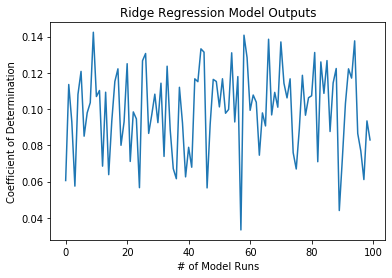

In [93]:
plt.plot(scores)
plt.ylabel('Coefficient of Determination')
plt.xlabel('# of Model Runs')
plt.title('Ridge Regression Model Outputs')
plt.show()

3.364466286477714e-07


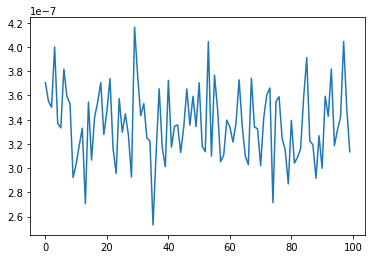

In [91]:
# mean squared
means = []
for i in results:
    means.append(i[1])
plt.plot(means)

print(sum(means)/len(means))

In [94]:
#latency
def ridge_regression(df, features_list, y = "latency", a = 1.0):
    # Load the dataset
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    clf = Ridge(alpha=a)

    # Train the model using the training sets
    clf.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = clf.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    return r2_score(y_test.reset_index(drop=True), y_pred), mean_squared_error(y_test, y_pred) #y_test.reset_index(drop=True), y_pred

In [95]:
# run model
results = []
for i in range(100):
    results.append(ridge_regression(data, features_list, a = 1.5))

0.4821438030240108
36908.82922835078


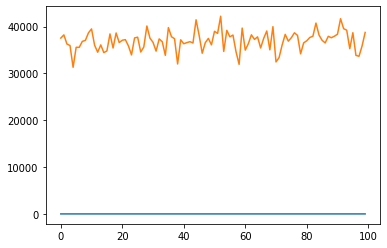

In [96]:
# (coefficient of determination) regression score function
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

print(sum(scores)/len(scores))

# mean squared
means = []
for i in results:
    means.append(i[1])
plt.plot(means)

print(sum(means)/len(means))

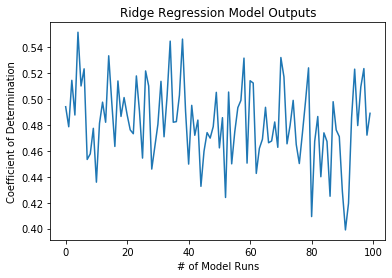

In [97]:
plt.plot(scores)
plt.ylabel('Coefficient of Determination')
plt.xlabel('# of Model Runs')
plt.title('Ridge Regression Model Outputs')
plt.show()

# Linear Regresesion Model

In [98]:
#loss
def linear_regression(df, features_list, y = "packet_loss_ratio"):
    # Load the dataset
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    return r2_score(y_test.reset_index(drop=True), y_pred), mean_squared_error(y_test, y_pred) #y_test.reset_index(drop=True), y_pred

In [99]:
# run model
results = []
for i in range(100):
    results.append(linear_regression(data, features_list))

0.09915645079733892
3.3540571904180266e-07


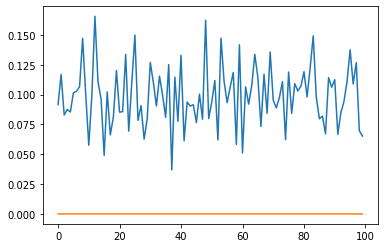

In [100]:
# (coefficient of determination) regression score function
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

print(sum(scores)/len(scores))

# mean squared
means = []
for i in results:
    means.append(i[1])
plt.plot(means)

print(sum(means)/len(means))

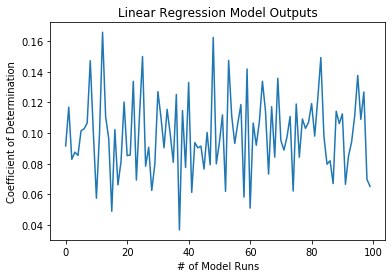

In [101]:
plt.plot(scores)
plt.ylabel('Coefficient of Determination')
plt.xlabel('# of Model Runs')
plt.title('Linear Regression Model Outputs')
plt.show()

In [102]:
#latency
def linear_regression(df, features_list, y = "latency"):
    # Load the dataset
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    return r2_score(y_test.reset_index(drop=True), y_pred), mean_squared_error(y_test, y_pred) #y_test.reset_index(drop=True), y_pred

In [103]:
# run model
results = []
for i in range(100):
    results.append(linear_regression(data, features_list))

0.487578235464931
36831.987873449245


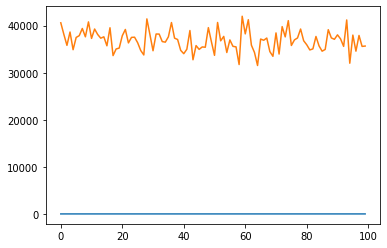

In [104]:
# (coefficient of determination) regression score function
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

print(sum(scores)/len(scores))

# mean squared
means = []
for i in results:
    means.append(i[1])
plt.plot(means)

print(sum(means)/len(means))

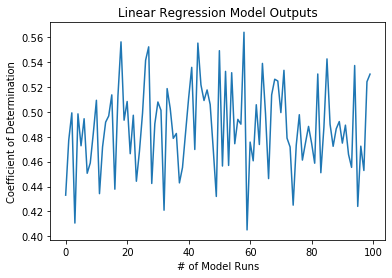

In [105]:
plt.plot(scores)
plt.ylabel('Coefficient of Determination')
plt.xlabel('# of Model Runs')
plt.title('Linear Regression Model Outputs')
plt.show()

# Decision Trees Model

In [106]:
#loss
def decision_tree(df, features_list, y = "packet_loss_ratio_class"):
    # Load the dataset 'packet_sizes_var', "Time"
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    clf = tree.DecisionTreeClassifier()

    # Train the model using the training sets
    clf = clf.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = clf.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    
    return clf.score(X_test, y_test.reset_index(drop=True)), mean_squared_error(y_test, y_pred) #y_test.reset_index(drop=True), y_pred

In [107]:
# run model
results = []
for i in range(100):
    results.append(decision_tree(data, features_list))

0.5171914893617022
2.608342700342548e-07


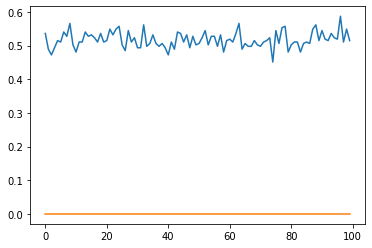

In [108]:
# (coefficient of determination) regression score function
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

print(sum(scores)/len(scores))

# mean squared
means = []
for i in results:
    means.append(i[1])
plt.plot(means)

print(sum(means)/len(means))

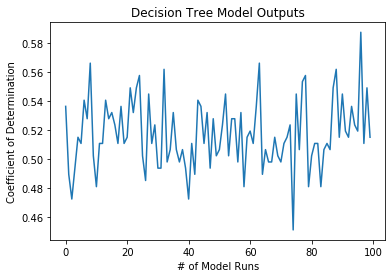

In [109]:
plt.plot(scores)
plt.ylabel('Coefficient of Determination')
plt.xlabel('# of Model Runs')
plt.title('Decision Tree Model Outputs')
plt.show()

In [110]:
#latency
def decision_tree(df, features_list, y = "latency"):
    # Load the dataset 'packet_sizes_var', "Time"
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    clf = tree.DecisionTreeClassifier()

    # Train the model using the training sets
    clf = clf.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = clf.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    
    return clf.score(X_test, y_test.reset_index(drop=True)), mean_squared_error(y_test, y_pred) #y_test.reset_index(drop=True), y_pred

In [111]:
# run model
results = []
for i in range(100):
    results.append(decision_tree(data, features_list))

0.4821702127659575
62701.27659574466


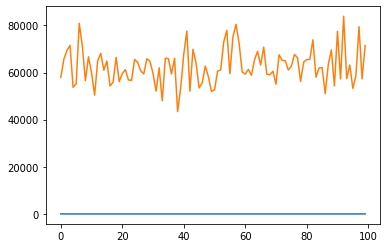

In [112]:
# (coefficient of determination) regression score function
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

print(sum(scores)/len(scores))

# mean squared
means = []
for i in results:
    means.append(i[1])
plt.plot(means)

print(sum(means)/len(means))

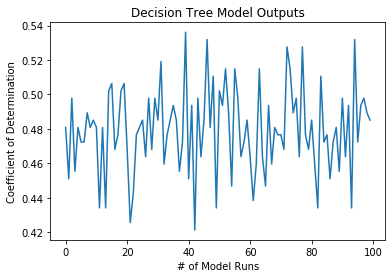

In [118]:
plt.plot(scores)
plt.ylabel('Coefficient of Determination')
plt.xlabel('# of Model Runs')
plt.title('Decision Tree Model Outputs')
plt.show()

In [114]:
#latency class
def decision_tree(df, features_list, y = "latency_class"):
    # Load the dataset 'packet_sizes_var', "Time"
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    clf = tree.DecisionTreeClassifier()

    # Train the model using the training sets
    clf = clf.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = clf.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    
    return clf.score(X_test, y_test.reset_index(drop=True)), mean_squared_error(y_test, y_pred) #y_test.reset_index(drop=True), y_pred

In [115]:
# run model
results = []
for i in range(100):
    results.append(decision_tree(data, features_list))

0.47948936170212764
61466.382978723406


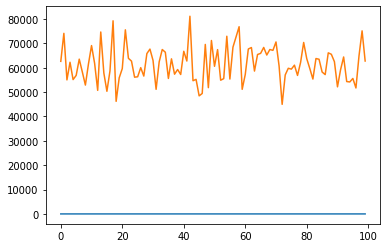

In [116]:
# (coefficient of determination) regression score function
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

print(sum(scores)/len(scores))

# mean squared
means = []
for i in results:
    means.append(i[1])
plt.plot(means)

print(sum(means)/len(means))

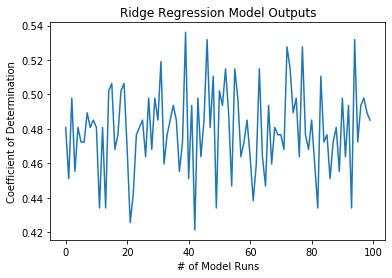

In [117]:
plt.plot(scores)
plt.ylabel('Coefficient of Determination')
plt.xlabel('# of Model Runs')
plt.title('Ridge Regression Model Outputs')
plt.show()

# SVM Model

In [119]:
#loss
def svm(df, features_list, y = "packet_loss_ratio_class"):
    # Load the dataset 'packet_sizes_var', "Time"
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

    # Train the model using the training sets
    clf = clf.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = clf.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    
    return clf.score(X_test, y_test.reset_index(drop=True)), mean_squared_error(y_test, y_pred) #y_test.reset_index(drop=True), y_pred

In [120]:
# run model
results = []
for i in range(100):
    results.append(svm(data, features_list))

0.43791489361702124
2.855999768418006e-07


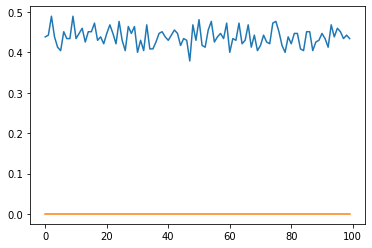

In [121]:
# (coefficient of determination) regression score function
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

print(sum(scores)/len(scores))

# mean squared
means = []
for i in results:
    means.append(i[1])
plt.plot(means)

print(sum(means)/len(means))

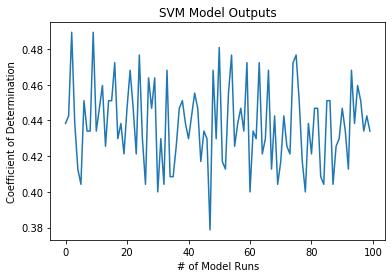

In [122]:
plt.plot(scores)
plt.ylabel('Coefficient of Determination')
plt.xlabel('# of Model Runs')
plt.title('SVM Model Outputs')
plt.show()

In [123]:
#latency
def svm(df, features_list, y = "latency"):
    # Load the dataset 'packet_sizes_var', "Time"
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

    # Train the model using the training sets
    clf = clf.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = clf.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    
    return clf.score(X_test, y_test.reset_index(drop=True)), mean_squared_error(y_test, y_pred) #y_test.reset_index(drop=True), y_pred

In [124]:
# run model
results = []
for i in range(100):
    results.append(svm(data, features_list))

0.4592340425531915
51570.212765957454


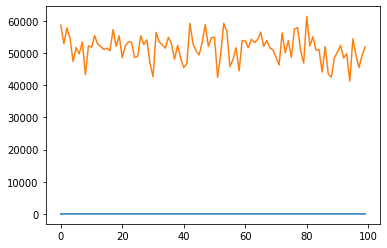

In [125]:
# (coefficient of determination) regression score function
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

print(sum(scores)/len(scores))

# mean squared
means = []
for i in results:
    means.append(i[1])
plt.plot(means)

print(sum(means)/len(means))

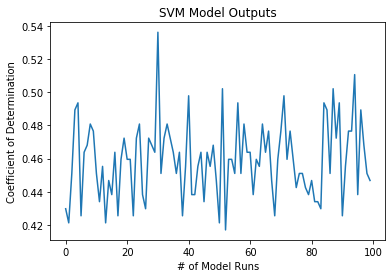

In [126]:
plt.plot(scores)
plt.ylabel('Coefficient of Determination')
plt.xlabel('# of Model Runs')
plt.title('SVM Model Outputs')
plt.show()

In [127]:
#latency class
def svm(df, features_list, y = "latency_class"):
    # Load the dataset 'packet_sizes_var', "Time"
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

    # Train the model using the training sets
    clf = clf.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = clf.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    
    return clf.score(X_test, y_test.reset_index(drop=True)), mean_squared_error(y_test, y_pred) #y_test.reset_index(drop=True), y_pred

In [128]:
# run model
results = []
for i in range(100):
    results.append(svm(data, features_list))

0.4689361702127661
49035.744680851065


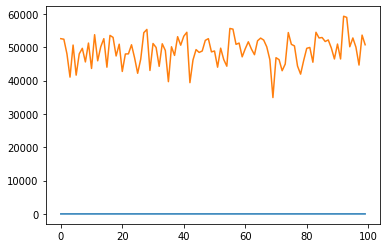

In [129]:
# (coefficient of determination) regression score function
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

print(sum(scores)/len(scores))

# mean squared
means = []
for i in results:
    means.append(i[1])
plt.plot(means)

print(sum(means)/len(means))

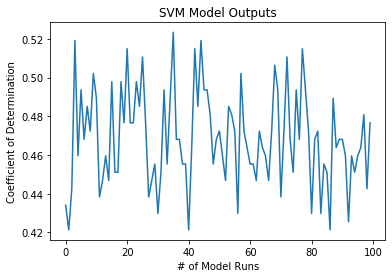

In [130]:
plt.plot(scores)
plt.ylabel('Coefficient of Determination')
plt.xlabel('# of Model Runs')
plt.title('SVM Model Outputs')
plt.show()

# KNN Regression

In [65]:
#loss
def knn(df, features_list, y = "packet_loss_ratio", n = 2):
    # Load the dataset 'packet_sizes_var', "Time"
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    neigh = KNeighborsRegressor(n_neighbors=n)

    # Train the model using the training sets
    neigh = neigh.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = neigh.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    
    return r2_score(y_test.reset_index(drop=True), y_pred), mean_squared_error(y_test, y_pred) #y_test.reset_index(drop=True), y_pred

In [66]:
# run model
results = []
for i in range(100):
    results.append(knn(data, features_list, n = 5))

-0.02825038454740966
3.870757325999904e-07


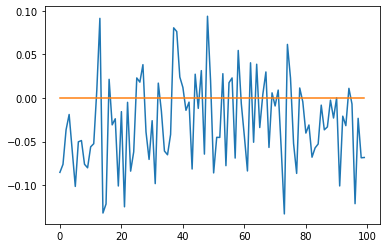

In [67]:
# (coefficient of determination) regression score function
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

print(sum(scores)/len(scores))

# mean squared
means = []
for i in results:
    means.append(i[1])
plt.plot(means)

print(sum(means)/len(means))

In [68]:
#latency
def knn(df, features_list, y = "latency", n = 2):
    # Load the dataset 'packet_sizes_var', "Time"
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    neigh = KNeighborsRegressor(n_neighbors=n)

    # Train the model using the training sets
    neigh = neigh.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = neigh.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    
    return r2_score(y_test.reset_index(drop=True), y_pred), mean_squared_error(y_test, y_pred) #y_test.reset_index(drop=True), y_pred

In [70]:
# run model
results = []
for i in range(100):
    results.append(knn(data, features_list, n = 5))

-0.12235215956953364
80942.65531914894


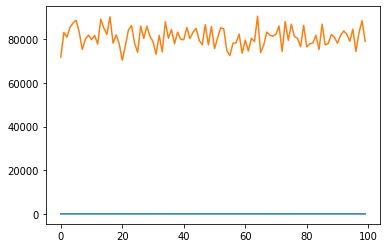

In [71]:
# (coefficient of determination) regression score function
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

print(sum(scores)/len(scores))

# mean squared
means = []
for i in results:
    means.append(i[1])
plt.plot(means)

print(sum(means)/len(means))

In [72]:
#loss
def knn_classify(df, features_list, y = "packet_loss_ratio_class", n = 2):
    # Load the dataset 'packet_sizes_var', "Time"
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    neigh = KNeighborsClassifier(n_neighbors=n)

    # Train the model using the training sets
    neigh = neigh.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = neigh.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    
    return r2_score(y_test.reset_index(drop=True), y_pred), mean_squared_error(y_test, y_pred) #y_test.reset_index(drop=True), y_pred

In [73]:
# run model
results = []
for i in range(100):
    results.append(knn_classify(data, features_list, n = 5))

-0.40740877279025284
5.315067723259515e-07


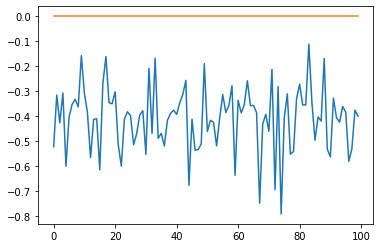

In [74]:
# (coefficient of determination) regression score function
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

print(sum(scores)/len(scores))

# mean squared
means = []
for i in results:
    means.append(i[1])
plt.plot(means)

print(sum(means)/len(means))

In [75]:
#loss
def knn_classify(df, features_list, y = "latency_class", n = 2):
    # Load the dataset 'packet_sizes_var', "Time"
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    neigh = KNeighborsClassifier(n_neighbors=n)

    # Train the model using the training sets
    neigh = neigh.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = neigh.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    
    return r2_score(y_test.reset_index(drop=True), y_pred), mean_squared_error(y_test, y_pred) #y_test.reset_index(drop=True), y_pred

In [76]:
# run model
results = []
for i in range(100):
    results.append(knn_classify(data, features_list, n = 2))

-0.7924463430688213
128129.78723404255


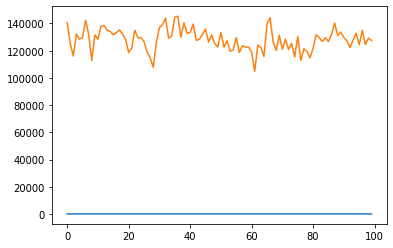

In [77]:
# (coefficient of determination) regression score function
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

print(sum(scores)/len(scores))

# mean squared
means = []
for i in results:
    means.append(i[1])
plt.plot(means)

print(sum(means)/len(means))